Question 1

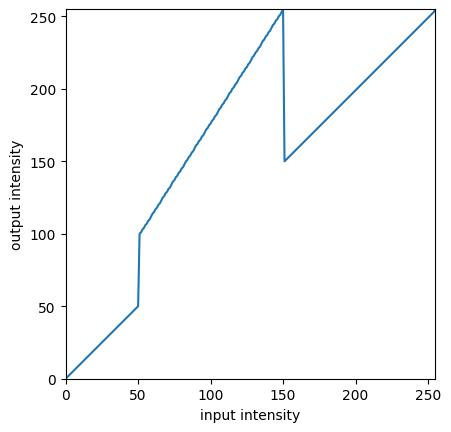

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(50,50),(51,100),(150,255),(151,150),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.a white matter


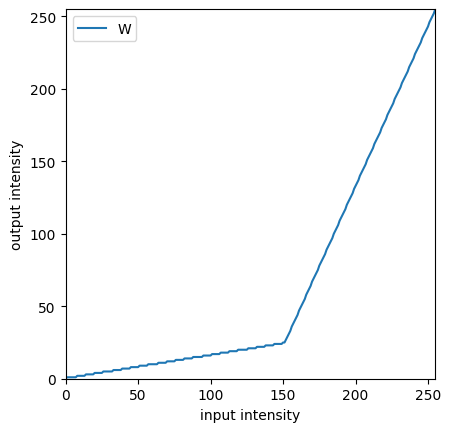

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(150,25),(151,25),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('White matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('White matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('White matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.b Gray matter enhanced

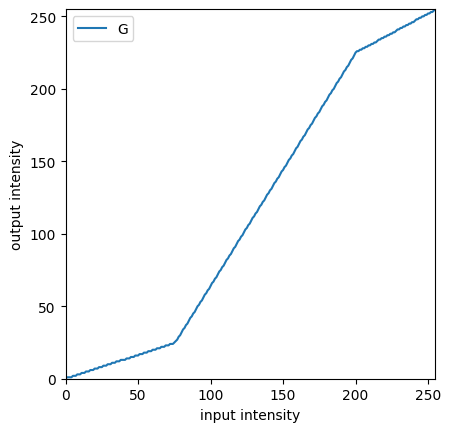

In [40]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(75,25),(76,26),(200,225),(201,226),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('Gray matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Gray matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('Gray matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 3 

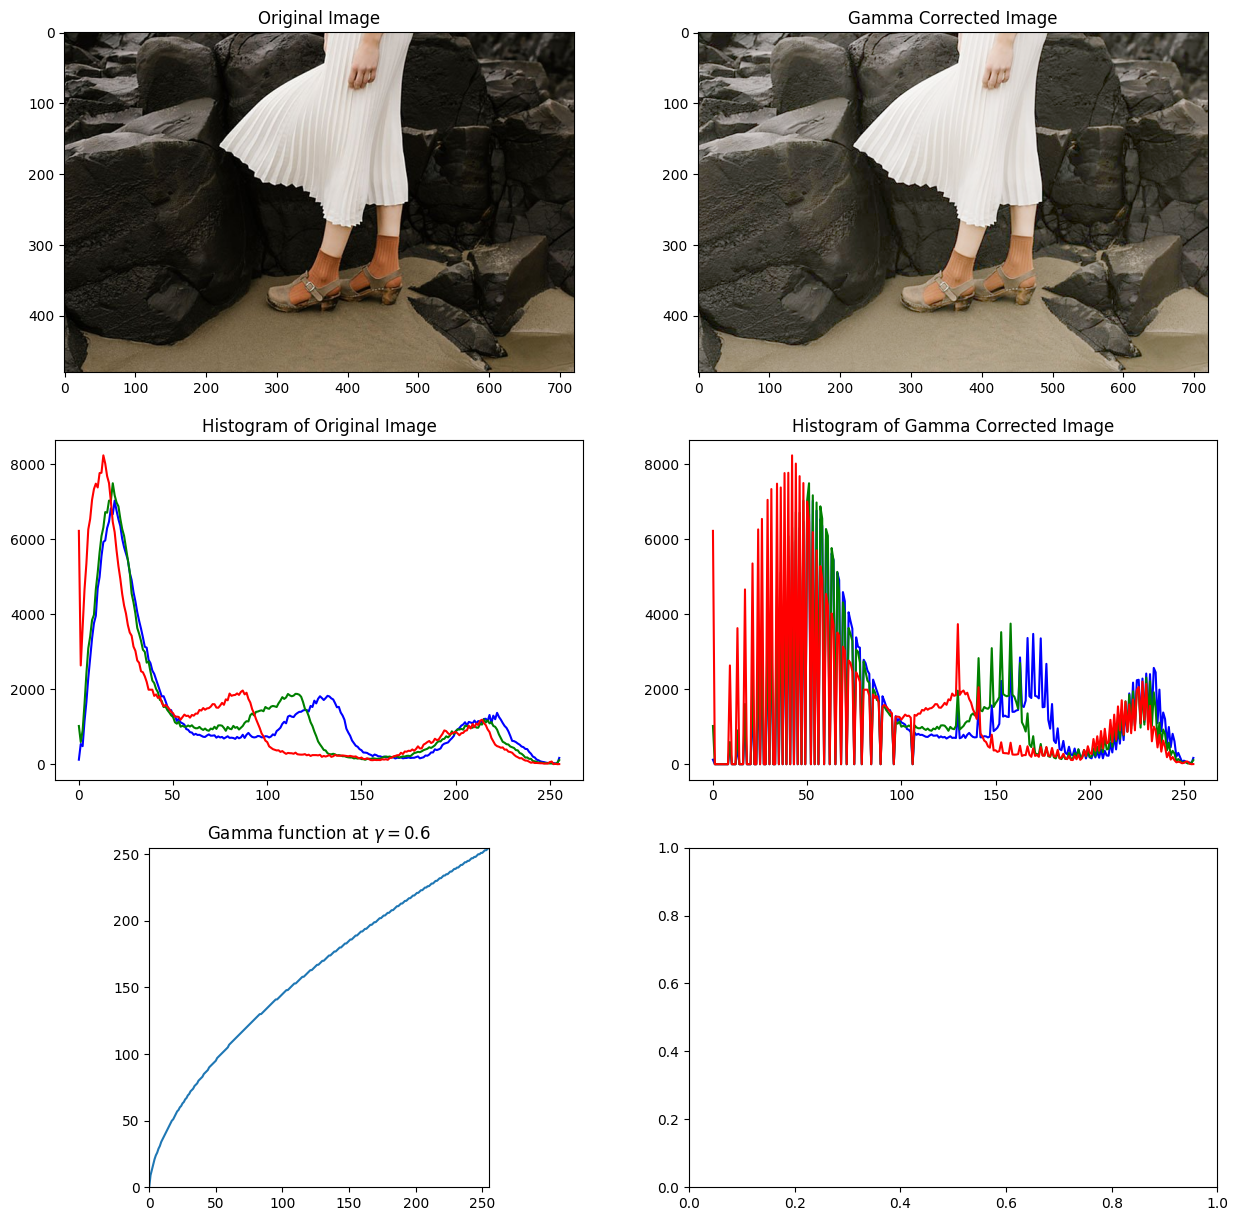

In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)
gamma = 0.6
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3, 2, figsize=(15,15))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[1, 0].set_title('Histogram of Original Image')
axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 0].set_title('Gamma function at $\gamma = {g}$'.format(g=gamma))

plt.show()
